In [1]:
import numpy as np

###`Q-1:` Find the nearest element in the array to a given integer.
```
Ex:-
a=23 and array - [10 17 24 31 38 45 52 59].
Nearest element is 24
```
Hint: Read about this function `argmin()`

In [13]:
# Solution-1
arr = np.arange(10, 60, 7)
key = 24
arr[np.argmin(np.abs(arr - key))]

np.int64(24)

In [14]:
# Solution-2
arr[np.searchsorted(a=arr, v=key, side='left')]

np.int64(24)

In [28]:
# Follow-up question: What if we had a higher dimensional ndarray?
# Solution-1
arr = np.linspace(
    start=-10,
    stop=10,
    endpoint=True,
    num=20,
    dtype=np.float64,
    retstep=False
).reshape((4, 5))
key = 2.13
arr.flatten()[np.argmin(np.abs(arr - key))]

np.float64(2.6315789473684212)

In [32]:
# Solution-2
arr.flatten()[np.searchsorted(a=arr.flatten(), v=key, side='left')]

np.float64(2.6315789473684212)

In [35]:
# Solution-3
arr[np.unravel_index(np.searchsorted(a=np.ravel(arr), v=key, side='left'), arr.shape)]

np.float64(2.6315789473684212)

###`Q-2:` Replace multiples of 3 or 5 as 0 in the given array.
```
arr=[1 2 3 4 5 6 7 9]

result-> [1 2 0 4 0 0 7 0]
```

In [41]:
# Solution
arr = np.arange(1, 9)
arr[-1] = 9
mask = (arr % 3 == 0) | (arr % 5 == 0)
arr[mask] = 0
arr

array([1, 2, 0, 4, 0, 0, 7, 0])

###`Q-3:` Use Fancy Indexing.
1. Double the array elements at  given indexes
```
arr = np.arrange(10)
indexes = [0,3,4,9]
```
Result -> `[ 0  1  2  6  8  5  6  7  8 18]`

2. Using a given array make a different array as in below example
```
array = [1,2,3]
result array -> [1 1 1 2 2 2 3 3 3]
```
* Internal-repetion should be as length of the array.

Hint:
```
if a is an array
a = [2,4]
a[[1,1,0,1]] will result in-> [4 4 2 4]
```

In [40]:
# Solution to Part-1
arr = np.arange(10)
indexes = [0, 3, 4, 9]
arr[indexes] *= 2
arr

array([ 0,  1,  2,  6,  8,  5,  6,  7,  8, 18])

In [43]:
# Solution to Part-2
arr = np.arange(1, 4)
np.repeat(a=arr, repeats=arr.size)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [45]:
# Alternative solution to Part-2
arr = np.arange(1, 4)
indexes = [0, 0, 0, 1, 1, 1, 2, 2, 2]
arr[indexes]

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

###`Q-4:` Your are given an array which is havig some nan value. You job is to fill those nan values with most common element in the array.
```
arr=np.array([[1,2,np.nan],[4,2,6],[np.nan,np.nan,5]])

```

In [49]:
# Solution
arr = np.array(
    [
        [1, 2, np.nan],
        [4, 2, 6],
        [np.nan, np.nan, 5]
    ]
)
mask = np.isnan(arr)
arr[mask] = 2
arr

array([[1., 2., 2.],
       [4., 2., 6.],
       [2., 2., 5.]])

In [67]:
# Alternative solution (More flexible)
arr = np.array(
    [
        [1, 2, np.nan],
        [4, 2, 6],
        [np.nan, np.nan, 5]
    ]
)
uniques, indexes, inverses, counts = np.unique(arr, return_index=True, return_inverse=True, return_counts=True, equal_nan=False)
value = uniques[np.argmax(counts)]
mask = np.isnan(arr)
arr[mask] = value
arr

array([[1., 2., 2.],
       [4., 2., 6.],
       [2., 2., 5.]])

In [54]:
np.unique?

Signature:      
np.unique(
    ar,
    return_index=False,
    return_inverse=False,
    return_counts=False,
    axis=None,
    *,
    equal_nan=True,
)
Call signature:  np.unique(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function unique at 0x7018d40ff1a0>
File:            ~/Desktop/learn-numpy/venv/lib/python3.12/site-packages/numpy/lib/_arraysetops_impl.py
Docstring:      
Find the unique elements of an array.

Returns the sorted unique elements of an array. There are three optional
outputs in addition to the unique elements:

* the indices of the input array that give the unique values
* the indices of the unique array that reconstruct the input array
* the number of times each unique value comes up in the input array

Parameters
----------
ar : array_like
    Input array. Unless `axis` is specified, this will be flattened if it
    is not already 1-D.
return_index : bool, optional
    If True, also return the indices of `ar` (along the specified

### `Q-5:` Write a NumPy program

- to find the missing data in a given array. Return a boolean matrix.
- also try to fill those missing values with 0. For that, you can use `np.nan_to_num(a)`

```python
import numpy as np

np.array([[3, 2, np.nan, 1],
          [10, 12, 10, 9],
          [5, np.nan, 1, np.nan]])
```

In [74]:
# Solution-1
arr = np.array(
    [
        [3, 2, np.nan, 1],
        [10, 12, 10, 9],
        [5, np.nan, 1, np.nan]
    ]
)
mask = np.isnan(arr)
arr[mask] = 0
arr

array([[ 3.,  2.,  0.,  1.],
       [10., 12., 10.,  9.],
       [ 5.,  0.,  1.,  0.]])

In [75]:
# Solution-2
arr = np.array(
    [
        [3, 2, np.nan, 1],
        [10, 12, 10, 9],
        [5, np.nan, 1, np.nan]
    ]
)
np.nan_to_num(arr, copy=False, nan=0, posinf=None, neginf=None)

array([[ 3.,  2.,  0.,  1.],
       [10., 12., 10.,  9.],
       [ 5.,  0.,  1.,  0.]])

In [68]:
np.nan_to_num?

Signature:       np.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)
Call signature:  np.nan_to_num(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function nan_to_num at 0x7018cf5258a0>
File:            ~/Desktop/learn-numpy/venv/lib/python3.12/site-packages/numpy/lib/_type_check_impl.py
Docstring:      
Replace NaN with zero and infinity with large finite numbers (default
behaviour) or with the numbers defined by the user using the `nan`,
`posinf` and/or `neginf` keywords.

If `x` is inexact, NaN is replaced by zero or by the user defined value in
`nan` keyword, infinity is replaced by the largest finite floating point
values representable by ``x.dtype`` or by the user defined value in
`posinf` keyword and -infinity is replaced by the most negative finite
floating point values representable by ``x.dtype`` or by the user defined
value in `neginf` keyword.

For complex dtypes, the above is applied to each of the real and
imaginary components of `

###`Q-6:` Given two arrays, X and Y, construct the Cauchy matrix C.
`Cij =1/(xi - yj)`

http://en.wikipedia.org/wiki/Cauchy_matrix
```
x = numpy.array([1,2,3,4]).reshape((-1, 1)
y = numpy.array([5,6,7])
```

In [ ]:
# code here

###`Q-7:` Plot this below equation.

$$\large y = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

**Note: This equation is called tanh activation function. In deep learning, many times this function is used. If you find some difference between the sigmoid function and this tanh function, note that to your notebook.**

In [76]:
from matplotlib import pyplot as plt

In [79]:
x = np.linspace(
    start=-10,
    stop=10,
    endpoint=True,
    num=50,
    dtype=np.float64,
    retstep=False
)
pos_exp = np.exp(x)
neg_exp = np.exp(-x)
y = (pos_exp - neg_exp) / (pos_exp + neg_exp)

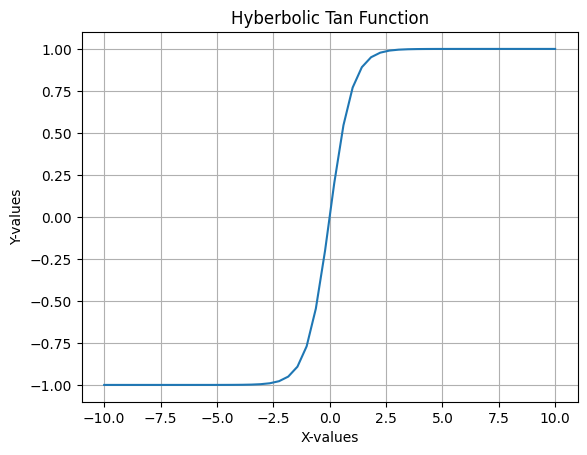

In [83]:
plt.plot(x, y)

plt.title('Hyberbolic Tan Function')
plt.xlabel('X-values')
plt.ylabel('Y-values')

plt.grid()
plt.show()

### 




`Q-8:` Plot the below equation.

$$\large y = \sqrt{36 - (x - 4)^2} + 2$$

The range of x should be between -2 to 10. $x ∈ [-2, 10]$



In [ ]:
# code here

### `Q-9:` Write a program implement Boradcasting Rule to check if two array can be added or not.
Given tuples of shapes.
```
shape of a- (3,2,2)
shape of b- (2,2)

check_broadcast(a, b) -> return Boolean (True if can broadcasted, False other wise.)
```

In [ ]:
# code here